In [1]:
import pandas as pd
import numpy as np
import torch
import warnings
warnings.filterwarnings("ignore")

torch.__version__

'2.4.0+cpu'

Data link : https://www.kaggle.com/datasets/jangedoo/utkface-new


### Preprocessing Our Raw Data
1. Creating dataframe for our features

In [2]:
import os

# dir = 'UTKFace'
# files = [filename for filename in os.listdir(dir)]

# data = {'path' : files}

dir = "/kaggle/input/utkface-new/UTKFace"
files = [filename for filename in os.listdir(dir)]
data = {'path' : files}
df = pd.DataFrame(data)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    23708 non-null  object
dtypes: object(1)
memory usage: 185.3+ KB


The features for this dataset is provided in the filename itself `[age]_[gender]_[race]_[date&time].jpg`

In [3]:
## adding extra features to our dataframe

temp = []
for x in df['path']:
    temp.append(x.split('_'))


temp = pd.DataFrame(temp)

columns = ['age','gender','race','date']

temp.columns = columns

temp



,age,gender,race,date
0,26,0,2,20170104023102422.jpg.chip.jpg
1,22,1,1,20170112233644761.jpg.chip.jpg
2,21,1,3,20170105003215901.jpg.chip.jpg
3,28,0,0,20170117180555824.jpg.chip.jpg
4,17,1,4,20170103222931966.jpg.chip.jpg
...,...,...,...,...
23703,41,0,0,20170109012220690.jpg.chip.jpg
23704,42,0,0,20170117185738076.jpg.chip.jpg
23705,2,0,2,20161219221701671.jpg.chip.jpg
23706,65,1,0,20170110182002744.jpg.chip.jpg


In [4]:
df = pd.concat([temp,df],axis = 1)

df = df.drop(['date'],axis =1) #unnecessary feature

df

,age,gender,race,path
0,26,0,2,26_0_2_20170104023102422.jpg.chip.jpg
1,22,1,1,22_1_1_20170112233644761.jpg.chip.jpg
2,21,1,3,21_1_3_20170105003215901.jpg.chip.jpg
3,28,0,0,28_0_0_20170117180555824.jpg.chip.jpg
4,17,1,4,17_1_4_20170103222931966.jpg.chip.jpg
...,...,...,...,...
23703,41,0,0,41_0_0_20170109012220690.jpg.chip.jpg
23704,42,0,0,42_0_0_20170117185738076.jpg.chip.jpg
23705,2,0,2,2_0_2_20161219221701671.jpg.chip.jpg
23706,65,1,0,65_1_0_20170110182002744.jpg.chip.jpg


## From MetaData we have following information

1. `[age]`is an integer from 0 to 116, indicating the age
2. `[gender]` is either 0 (male) or 1 (female)
3. `[race]` is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

In [5]:
# Creating index map for race

race_mapping = {0:'White',
       1:'Black',
       2:'Asian',
       3:'Indian',
       4:'Others'}


### Visualizing Data

<Axes: xlabel='age', ylabel='Density'>

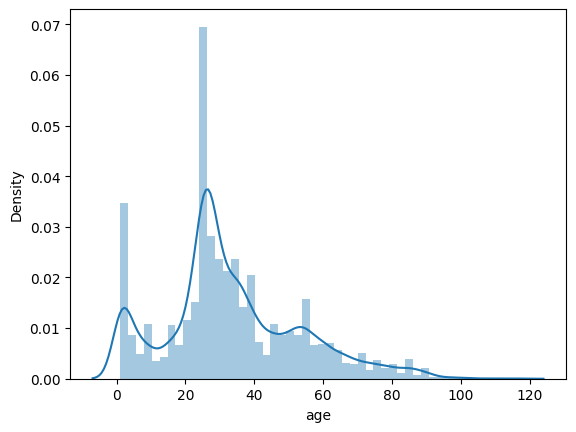

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Let's visualize age category first
sns.distplot(df['age'])

race
0                                 10078
1                                  4526
3                                  3975
2                                  3434
4                                  1692
20170109142408075.jpg.chip.jpg        1
20170109150557335.jpg.chip.jpg        1
20170116174525125.jpg.chip.jpg        1
Name: count, dtype: int64


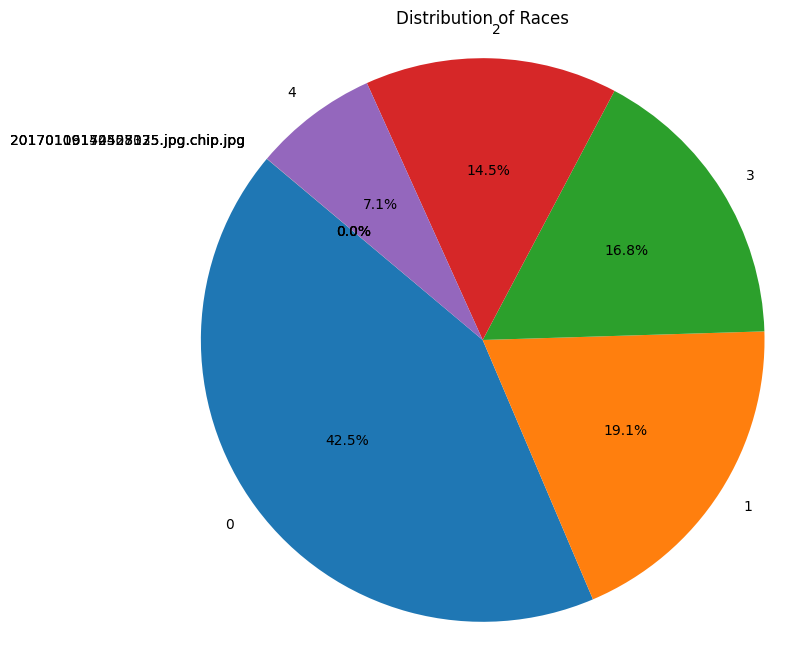

In [7]:
# delete abnormal rows || task to be assigned


race_counts = df['race'].value_counts()

print(race_counts)

plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Races')
plt.show()


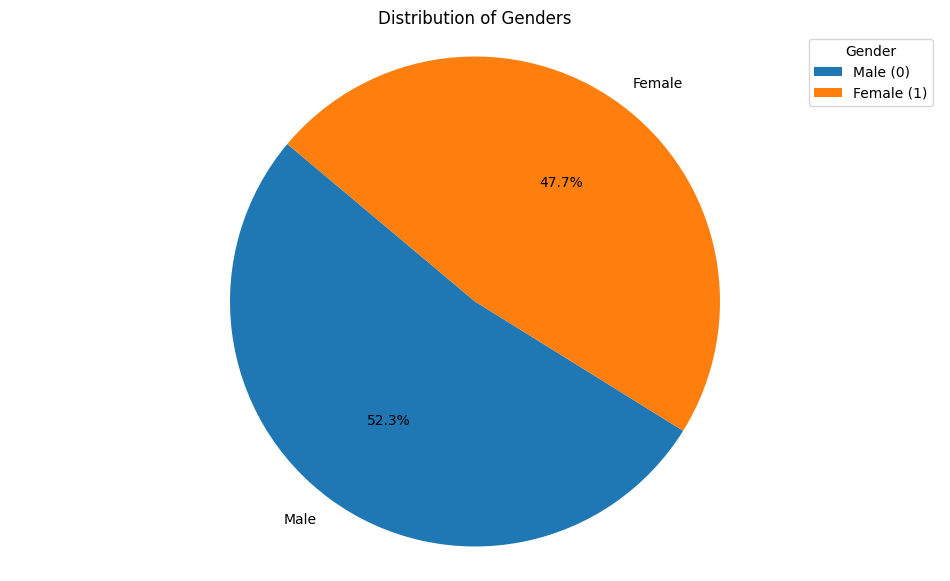

In [8]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the gender data
gender_counts = df['gender'].value_counts()

# Define labels for the gender values
gender_labels = ['Male', 'Female']

# Create the pie chart
plt.figure(figsize=(12, 7))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Genders')

# Add a legend
plt.legend(title='Gender', labels=['Male (0)', 'Female (1)'], loc='best')

# Show the plot
plt.show()


In [9]:
import cv2

In [10]:
!pip install opencv-python


In [11]:
import cv2


image_dir = '/kaggle/input/utkface-new/UTKFace'

image_arrays = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):  

        img = cv2.imread(os.path.join(image_dir, filename))
        
        if img is not None:
            image_arrays.append(img)


image_array = np.array(image_arrays)

print("Shape of the NumPy array:", image_array.shape)


Shape of the NumPy array: (23708, 200, 200, 3)


In [12]:
#Converting dataset into numpy array

X = df.drop(['path'],axis =1).to_numpy()
y = image_array

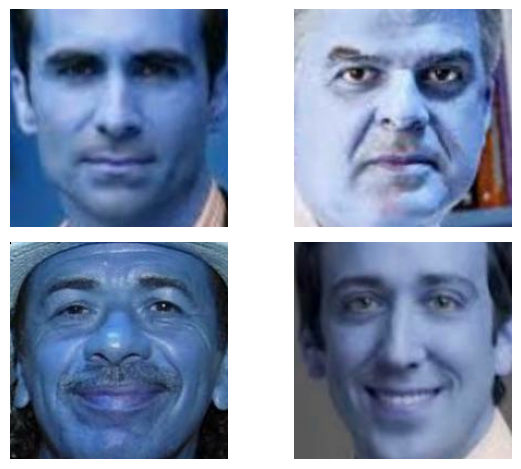

In [13]:
# Visualizing 5 random samples from y

randnums = np.random.randint(0, y.shape[0], 4)

fig, axs = plt.subplots(2, 2)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(y[randnums[i]])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [14]:
from torch.utils.data import Dataset
from torchvision import transforms
from torchvision.io import read_image


class CustomDataset(Dataset):

    def __init__(self,path,labels,transfrom=None):
        self.img_dir = path
        self.img_labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self,idx):
        img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        # label = self.img_labels.iloc[idx, 1]

        label = tuple(map(int, self.img_labels.iloc[idx, 1]))
        if self.transform:
            image = self.transform(image)

        
        return image,label

# Here normalization component was a standard found from the internet

transform = transforms.Compose([  
    transforms.ToPILImage(),
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),  # Resize the image to 28x28 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485], std=[0.229])  # Normalize image (for grayscale)
])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['path'], df['gender'], test_size=0.2, random_state=42)


training_data = pd.concat([X_train,y_train],axis=1)

testing_data = pd.concat([X_test,y_test],axis=1)


In [16]:
training_dataset = CustomDataset('/kaggle/input/utkface-new/UTKFace', training_data, transform)
testing_dataset = CustomDataset('/kaggle/input/utkface-new/UTKFace', testing_data, transform)


In [17]:
from torch.utils.data import DataLoader

batch_size = 32
train_dataloader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(testing_dataset, batch_size=batch_size)


In [18]:
next(iter(train_dataloader))[0].shape# Test column

torch.Size([32, 1, 28, 28])

In [19]:
#making model for our dataset

from torch import nn

class LinearModel(nn.Module):

    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=1),
            nn.Sigmoid()
        )

    def forward(self,x):
        return self.layer(x)
        

In [20]:
# Initializing model, loss function and optimization functions

model = LinearModel(
    input_shape=28*28, # need to set variable for this
    hidden_units= 20,
    output_shape= 1
)

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr=0.01)

In [21]:
# dummy code for testing 

dummy_x = torch.rand([1,1,28,28])
model(dummy_x)

tensor([[0.4731]], grad_fn=<SigmoidBackward0>)

In [22]:
# code for training and testing 

from tqdm.auto import tqdm
from timeit import default_timer as timer

# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()

    print(correct)
    acc = (correct / len(y_pred)) * 100
    return acc


torch.manual_seed(42)

EPOCHS = 10

train_loss = 0

train_loss_list = []
test_loss_list = []
accuracy_list = []

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch : {epoch}\n------")
    for batch,(X,y) in enumerate(train_dataloader):
        y_pred = model(X)
        loss = loss_fn(y_pred.squeeze(),y[0].to(torch.float32))
        train_loss += loss

        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()

        if batch%520 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader)} samples.")

    train_loss /=len(train_dataloader)
    

    print(f"Training loss : {train_loss}")
    train_loss_list.append(train_loss)
    test_loss, test_acc = 0,0

    model.eval()
    
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model(X_test)

            test_loss+=loss_fn(test_pred.squeeze(),y_test[0].to(torch.float32))
            test_pred = (test_pred.squeeze() >= 0.5).float() 
            test_acc += accuracy_fn(y_true=y_test[0].to(torch.float32),y_pred = test_pred)

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"Train loss: {train_loss:.4f} | Test loss : {test_loss:.4f} | Test acc : {test_acc:.4f}")
    test_loss_list.append(test_loss)
    accuracy_list.append(test_acc)



  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 0
------
Looked at 0/593 samples.
Looked at 16640/593 samples.
Training loss : 0.48997700214385986
27
28
25
25
27
26
25
24
25
23
25
24
25
28
26
29
29
24
26
28
26
26
26
24
27
23
28
24
26
25
25
25
22
26
30
26
25
23
25
25
26
27
24
23
26
28
23
29
28
26
24
26
25
22
28
24
27
26
24
26
26
26
25
30
26
28
29
28
28
24
25
27
24
20
25
25
25
24
26
24
23
30
23
23
30
25
24
27
27
25
29
25
29
24
25
26
23
21
25
23
25
23
23
28
24
27
28
28
24
27
26
23
26
27
26
26
29
27
25
26
23
24
25
26
27
23
24
30
24
27
21
27
24
28
26
26
29
27
26
25
29
26
26
24
28
24
29
26
6
Train loss: 0.4900 | Test loss : 0.4417 | Test acc : 80.4111
Epoch : 1
------
Looked at 0/593 samples.
Looked at 16640/593 samples.
Training loss : 0.42334800958633423
25
30
25
25
28
27
28
27
27
24
22
25
25
28
25
29
30
26
26
28
25
27
26
27
29
25
26
24
28
25
28
25
22
27
31
23
25
26
26
27
26
26
28
27
28
25
23
29
27
27
24
28
25
25
28
26
29
27
25
28
28
26
26
30
26
25
27
28
29
28
27
28
23
22
29
26
25
27
26
26
23
29
25
25
30
28
27
27
28
25
29
28
28


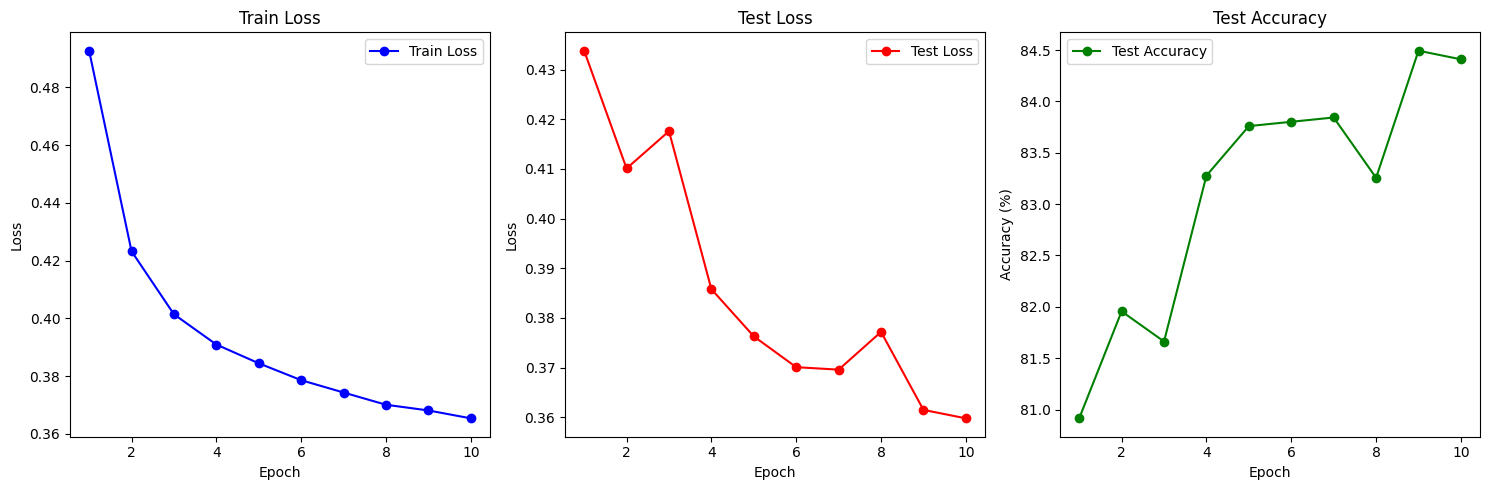

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Hardcoded values for train loss, test loss, and test accuracy
train_loss_list = np.array([0.4926593601703644, 0.42324143648147583, 0.4014234244823456, 0.39094552397727966, 0.384458065032959, 0.37860608100891113, 0.3743375539779663, 0.3700997531414032, 0.3681298792362213, 0.3653993010520935])
test_loss_list = np.array([0.4338, 0.4101, 0.4176, 0.3858, 0.3763, 0.3701, 0.3696, 0.3772, 0.3615, 0.3598])
accuracy_list = np.array([80.9144, 81.9561, 81.6625, 83.2774, 83.7598, 83.8017, 83.8437, 83.2564, 84.4938, 84.4100])

epochs = range(1, len(train_loss_list) + 1)

# Create subplots in a single row with 1 row and 3 columns
plt.figure(figsize=(15, 5))

# Subplot 1: Train Loss
plt.subplot(1, 3, 1)
plt.plot(epochs, train_loss_list, label='Train Loss', marker='o', color='b')
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Subplot 2: Test Loss
plt.subplot(1, 3, 2)
plt.plot(epochs, test_loss_list, label='Test Loss', marker='o', color='r')
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Subplot 3: Accuracy
plt.subplot(1, 3, 3)
plt.plot(epochs, accuracy_list, label='Test Accuracy', marker='o', color='g')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
test_loss_list = [x.item() for x in test_loss_list]

In [25]:
train_loss_list

array([0.49265936, 0.42324144, 0.40142342, 0.39094552, 0.38445807,
       0.37860608, 0.37433755, 0.37009975, 0.36812988, 0.3653993 ])